## Bank Customer Segementation Using Unsupervised Learning

Dataset taken from - https://www.kaggle.com/arjunbhasin2013/ccdata?select=CC+GENERAL.csv

The given dataset summarizes the usage behavior of almost 9000 active credit card holders during the last 6 months. 

CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES : Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user


### Importing libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [35]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [37]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Checking for missing values

In [38]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Imputing the missing values in MINIMUM_PAYMENTS with the mean value

In [39]:
df.loc[(df['MINIMUM_PAYMENTS'].isna() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

Imputing the missing values in CREDIT_LIMIT with the median value

In [40]:
df.loc[(df['CREDIT_LIMIT'].isna() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].median()

We delete column customer ID since it won't contribute in modelling

In [41]:
df.drop(['CUST_ID'], axis=1, inplace=True)

In [42]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Read and preprocess
df = pd.read_csv("CC GENERAL.csv")
df.drop('CUST_ID', axis=1, inplace=True)
df.fillna(method='ffill', inplace=True)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_scaled)

# Save the model and scaler
pickle.dump(kmeans, open("model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))


In [43]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [44]:
len(df.columns)

17

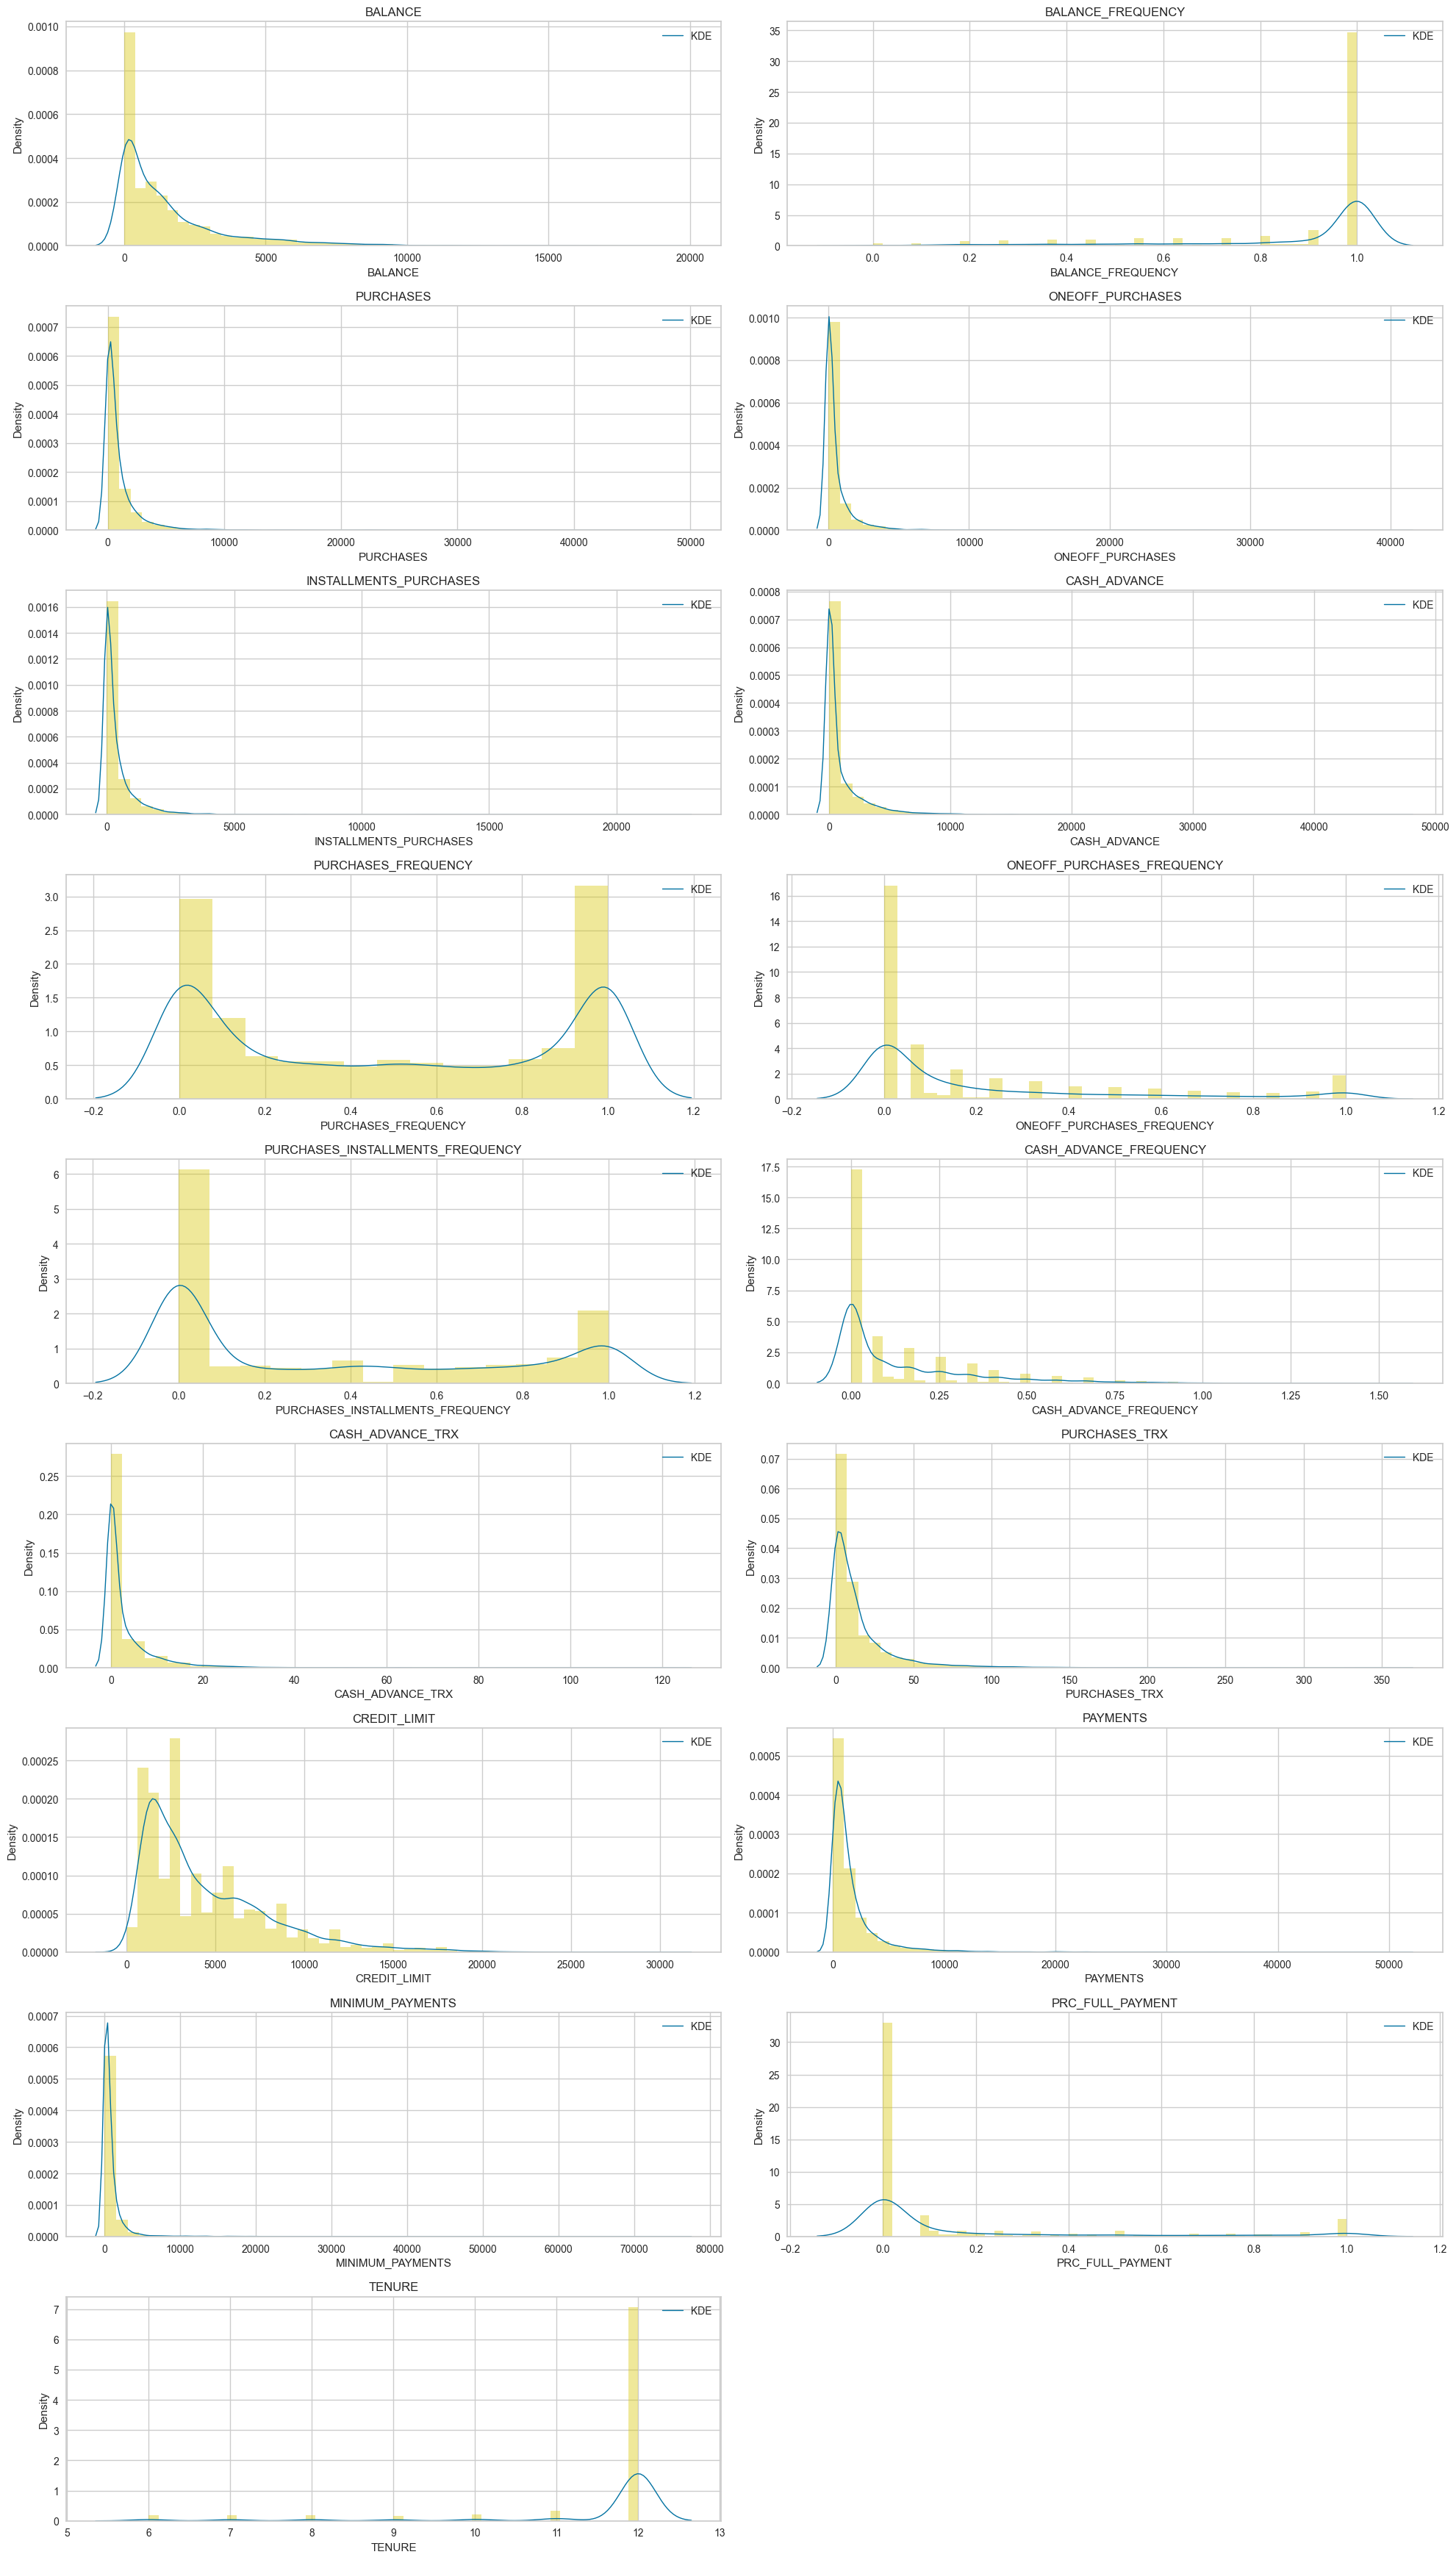

In [45]:
# Plotting a distplot
plt.figure(figsize=(20, 35))
for i in range(len(df.columns)):
    plt.subplot(9, 2, i+1)
    sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 1, "label": "KDE"}, hist_kws={"color": "y"})
    plt.title(df.columns[i])
    plt.legend()

plt.tight_layout()

Since the data is very skewed, we reduce skewness using square root method

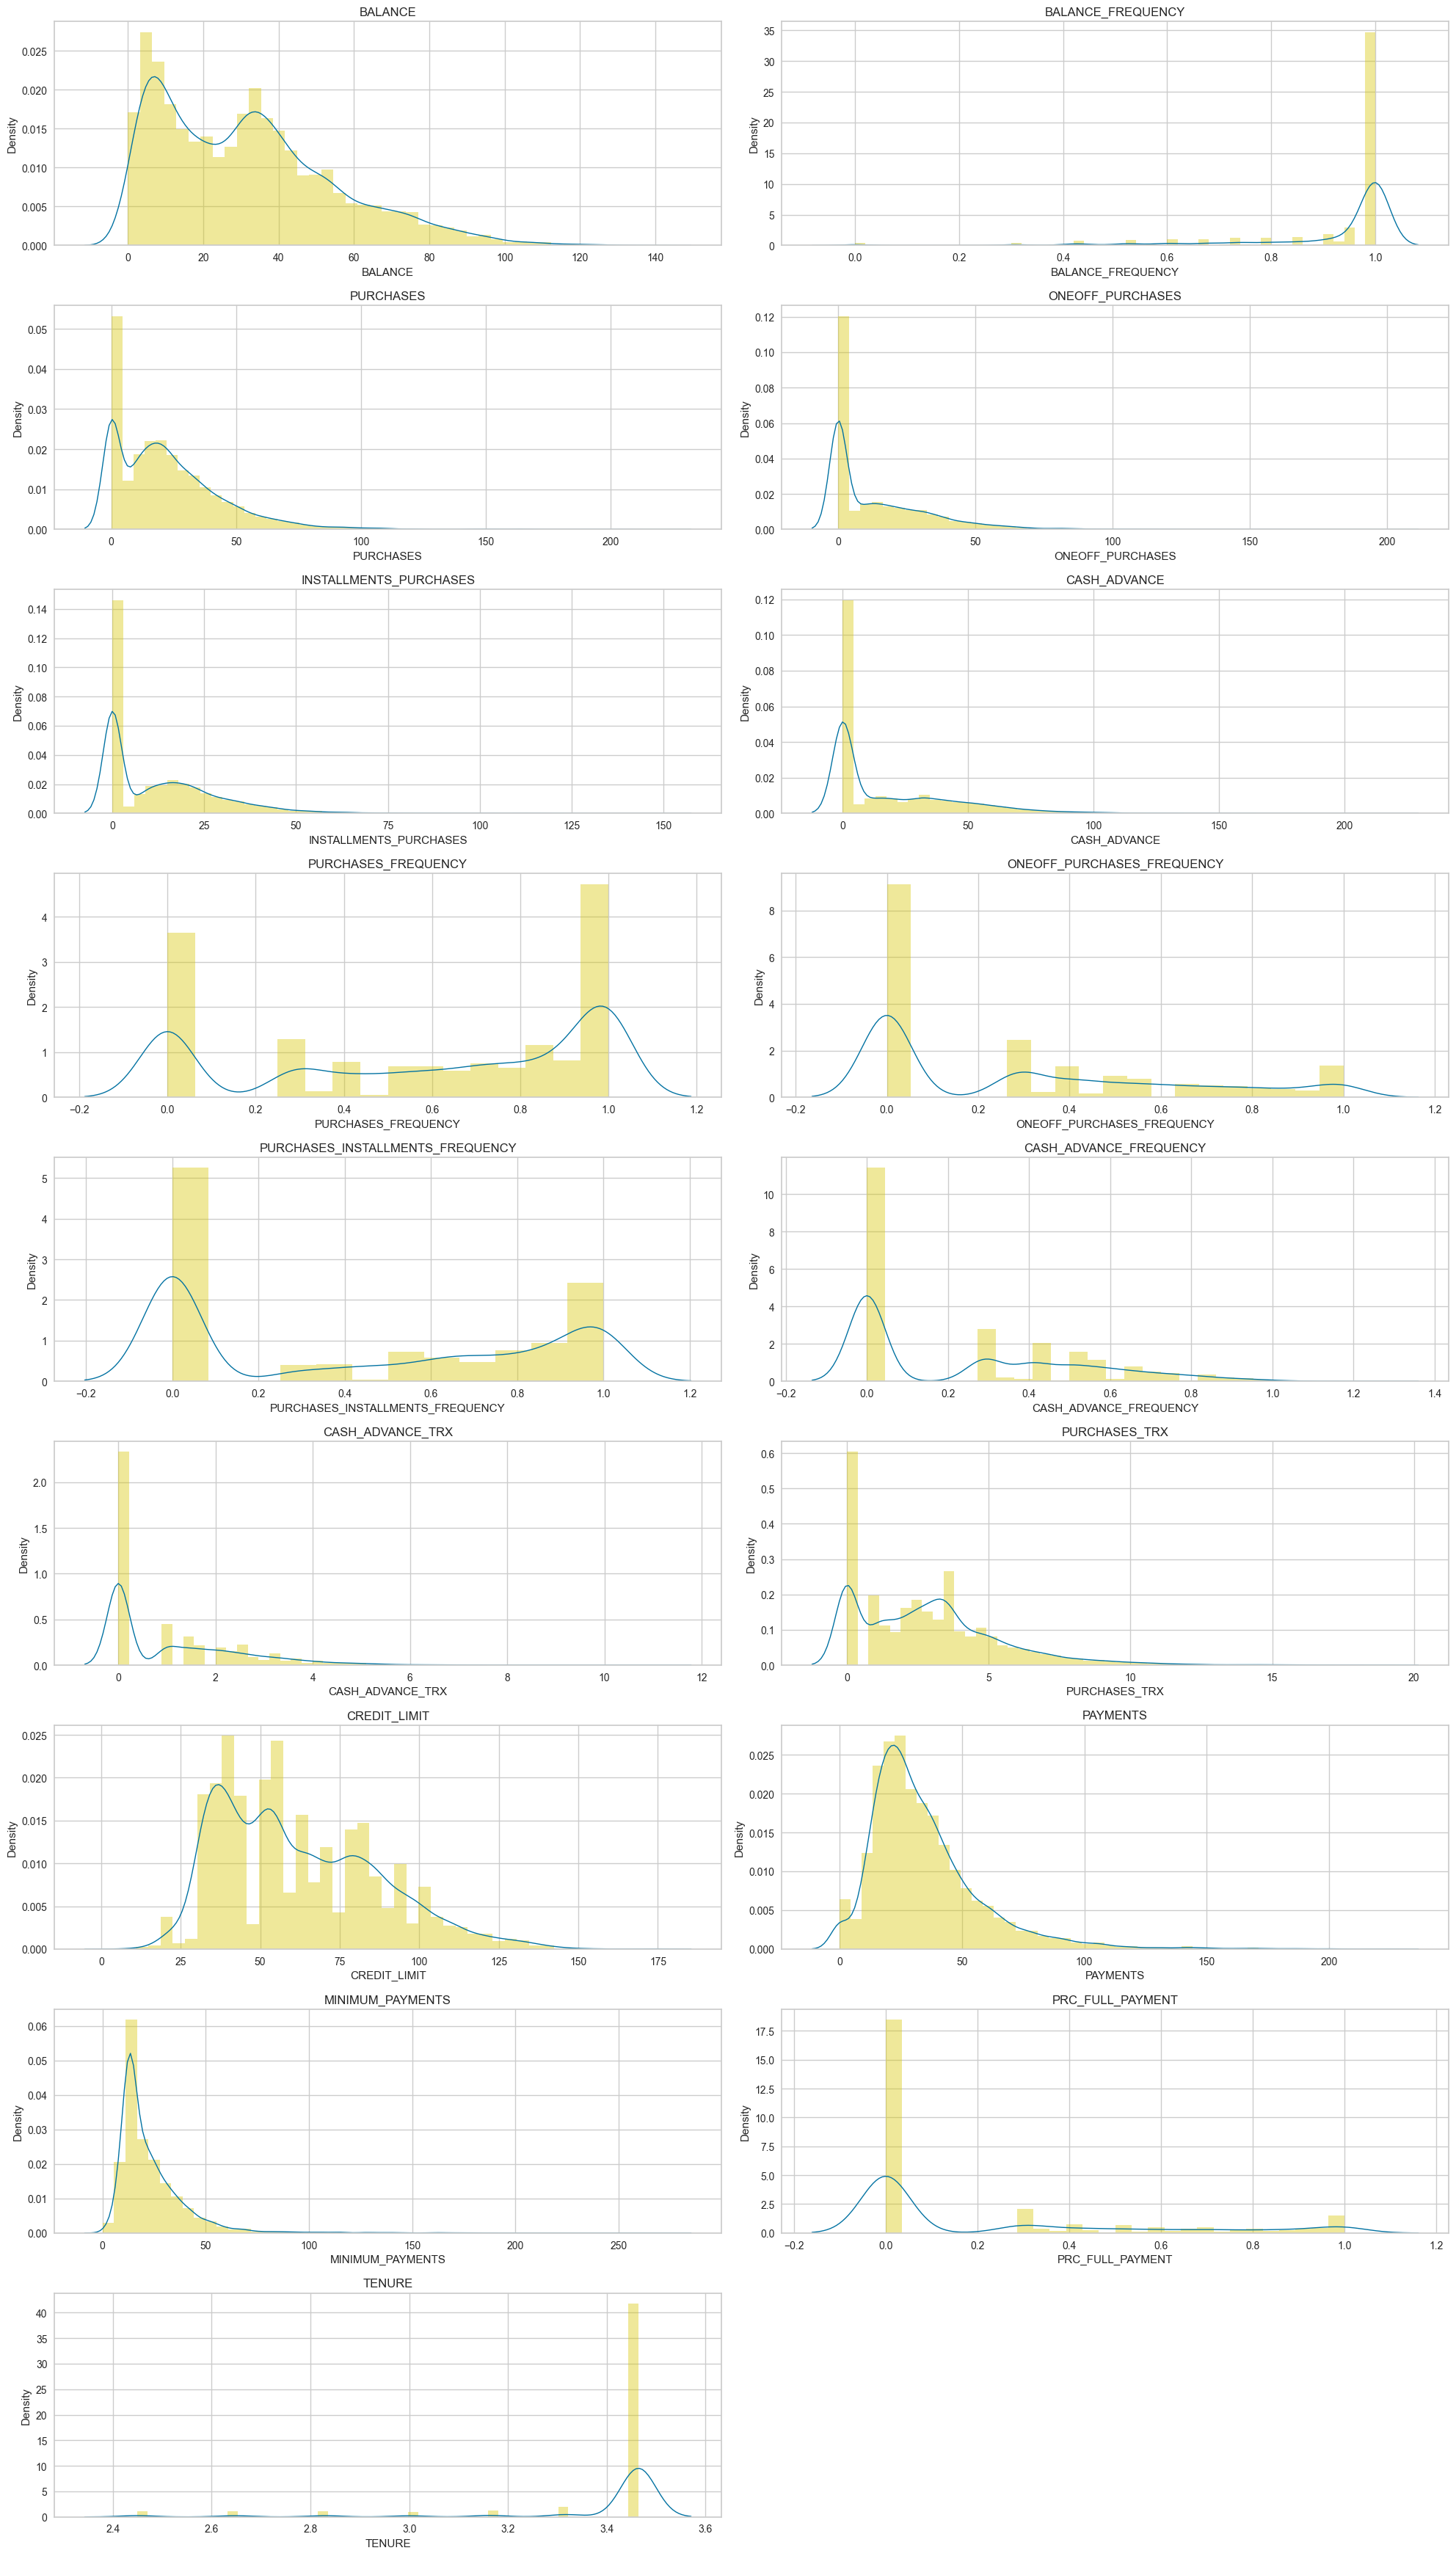

In [46]:
df2 = df.copy()

for col in df.columns:
    df2[col] = np.sqrt(df2[col])
# Plotting a distplot
plt.figure(figsize=(20, 35))
for i in range(len(df2.columns)):
    plt.subplot(9, 2, i+1)
    sns.distplot(df2[df2.columns[i]], kde_kws={"color": "b", "lw": 1, "label": "KDE"}, hist_kws={"color": "y"})
    plt.title(df2.columns[i])

plt.tight_layout()

Finding correlations in our dataset

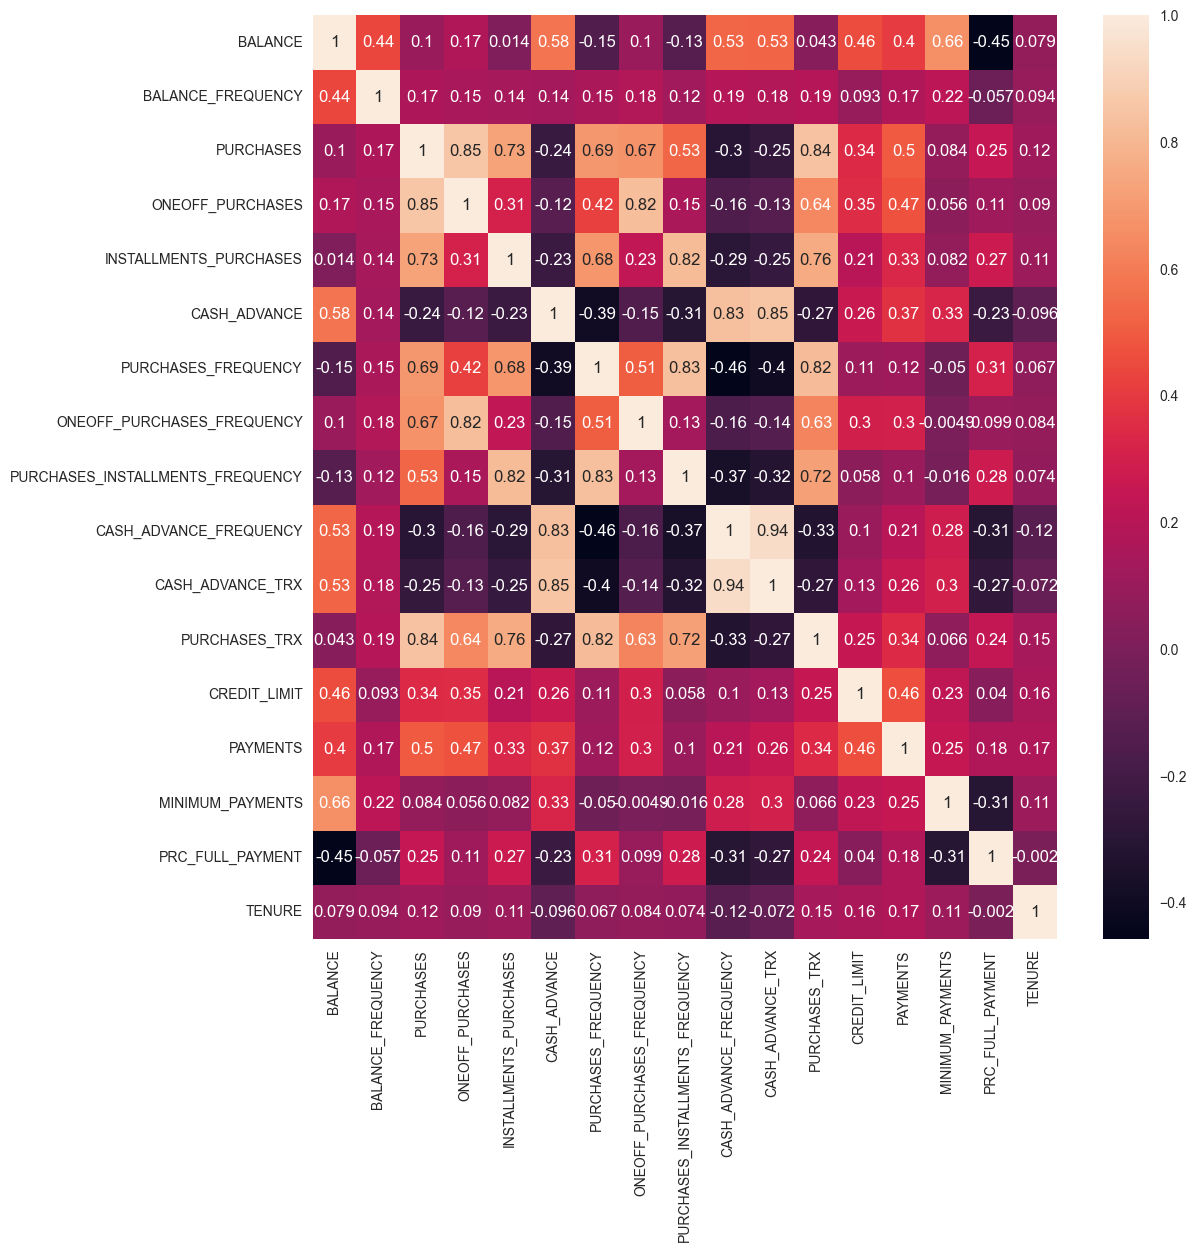

In [47]:
plt.figure(figsize=(12,12))
sns.heatmap(df2.corr(), annot=True)
plt.show()

### Scale the data using Standard Scaler

In [48]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)

In [49]:
df_scaled.shape

(8950, 17)

In [50]:
df_scaled

array([[-1.0780545 , -0.09712559, -0.59690132, ..., -0.64392125,
        -0.63618182,  0.35348056],
       [ 1.05361908,  0.19053935, -1.0423371 , ...,  0.52547181,
         0.78887411,  0.35348056],
       [ 0.77167992,  0.46414608,  0.22574803, ...,  0.09531358,
        -0.63618182,  0.35348056],
       ...,
       [-1.14422589, -0.04811222, -0.49431949, ..., -0.79657893,
         0.87531901, -4.27612743],
       [-1.19386072, -0.04811222, -1.0423371 , ..., -0.88659306,
         0.87531901, -4.27612743],
       [-0.52978249, -0.61472285,  0.46555636, ..., -0.77882933,
        -0.63618182, -4.27612743]])

### Perform PCA for dimensionality reduction 

In [51]:
pca = PCA(n_components=2, random_state=12)
principal_components = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data = principal_components, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-0.891472,-2.473018
1,-2.996623,2.024535
2,1.192386,0.384886
3,-0.785194,0.146490
4,-1.269509,-1.582612


### KMeans Clustering

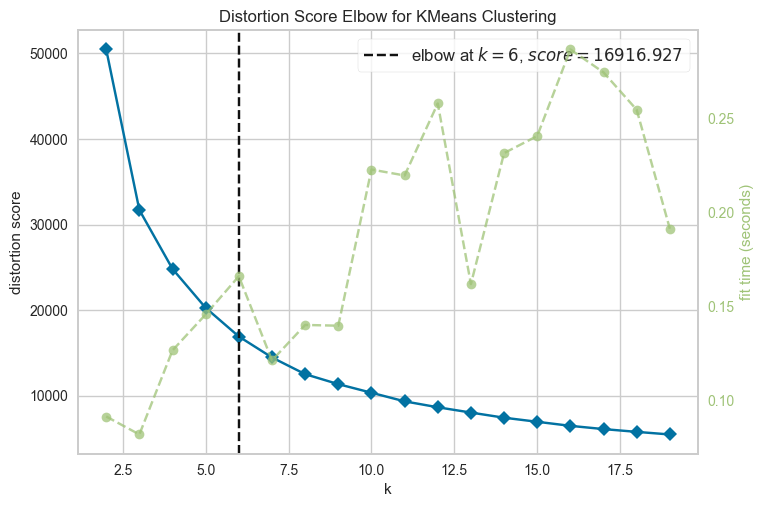

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2,20))

distortion_visualizer.fit(pca_df)       
distortion_visualizer.show()       

In [53]:
kmeans = KMeans(n_clusters=distortion_visualizer.elbow_value_, random_state=12)
kmeans.fit(pca_df)
labels=kmeans.labels_

In [54]:
clusters=pd.concat([df, pd.DataFrame({'Cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


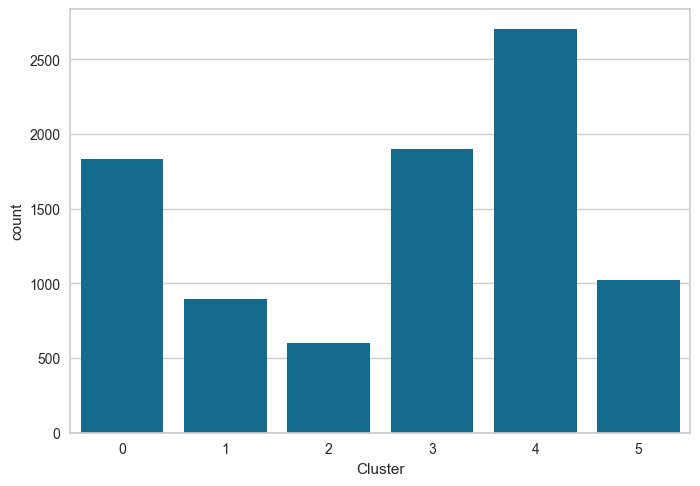

In [55]:
sns.countplot(x="Cluster", data=clusters);

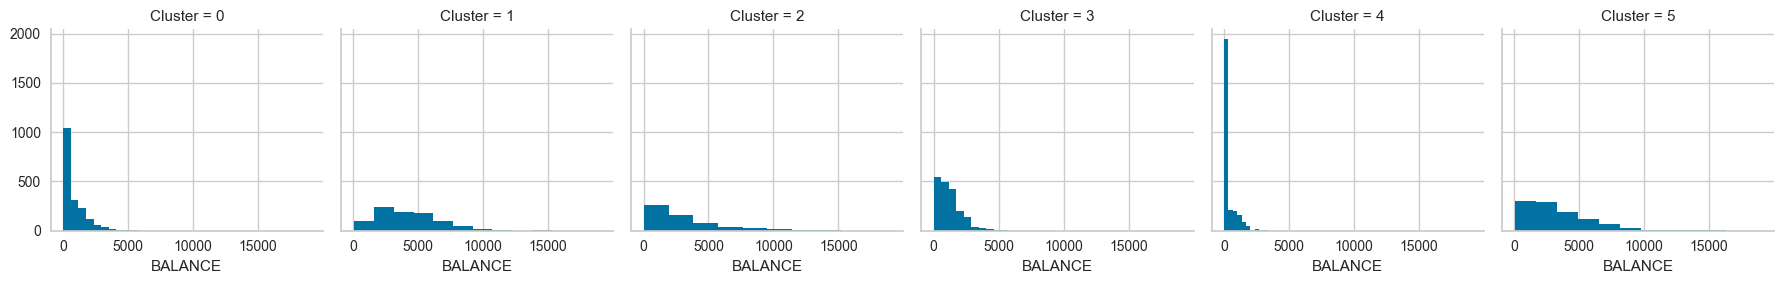

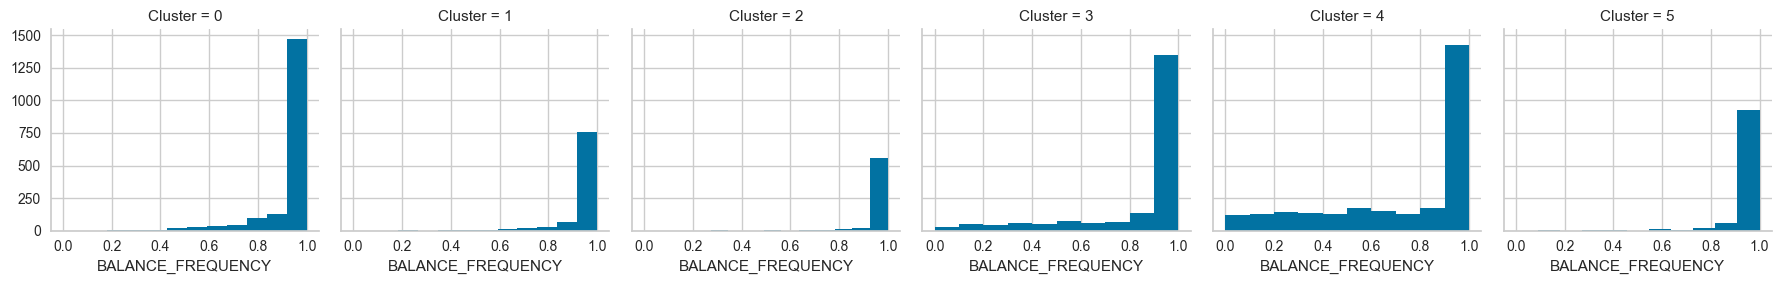

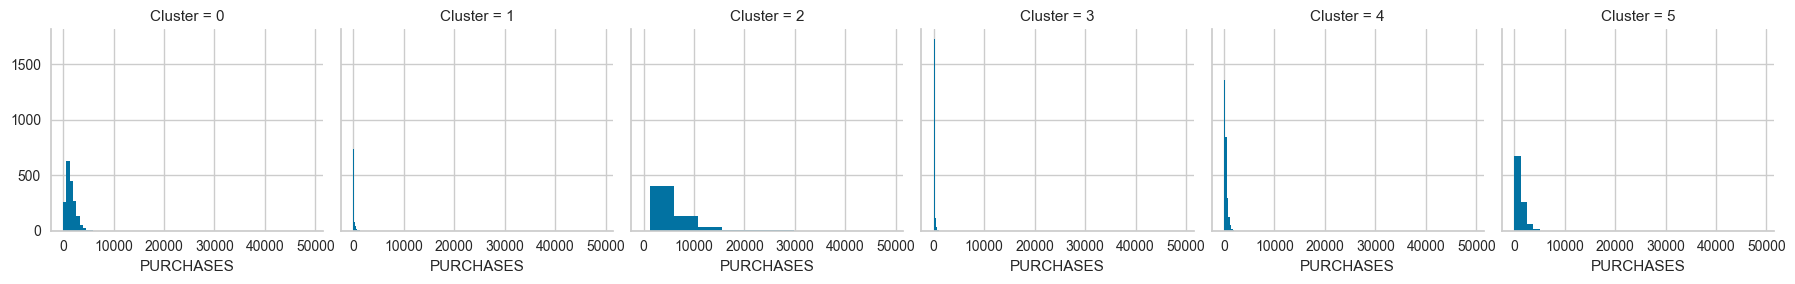

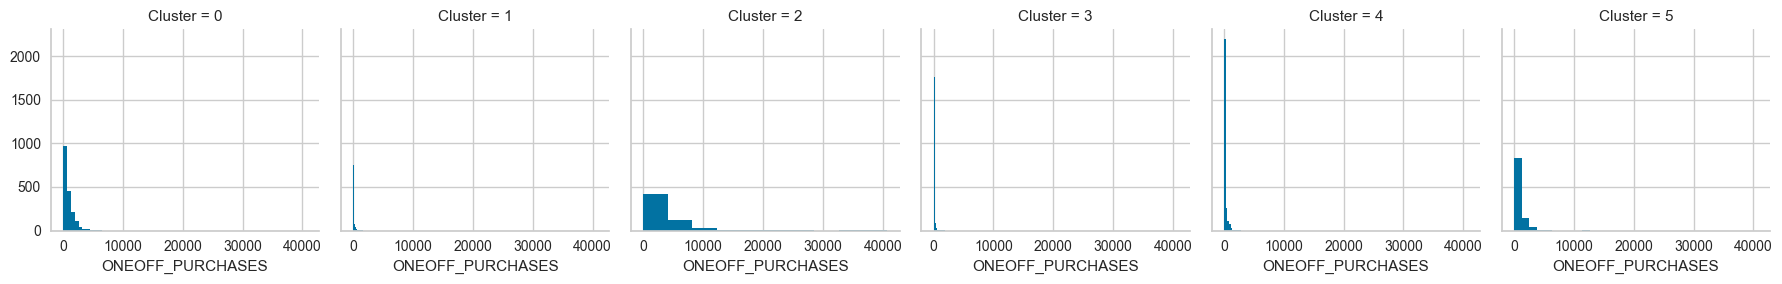

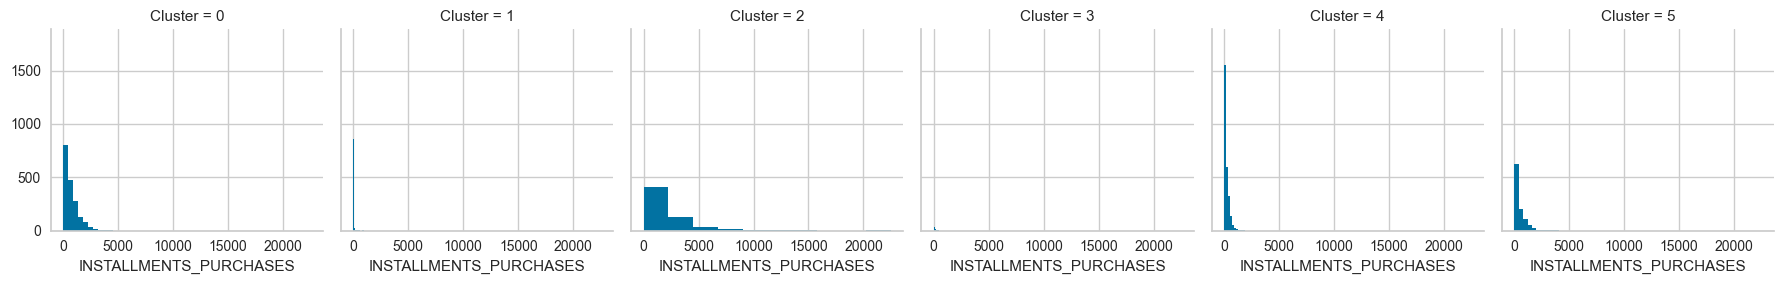

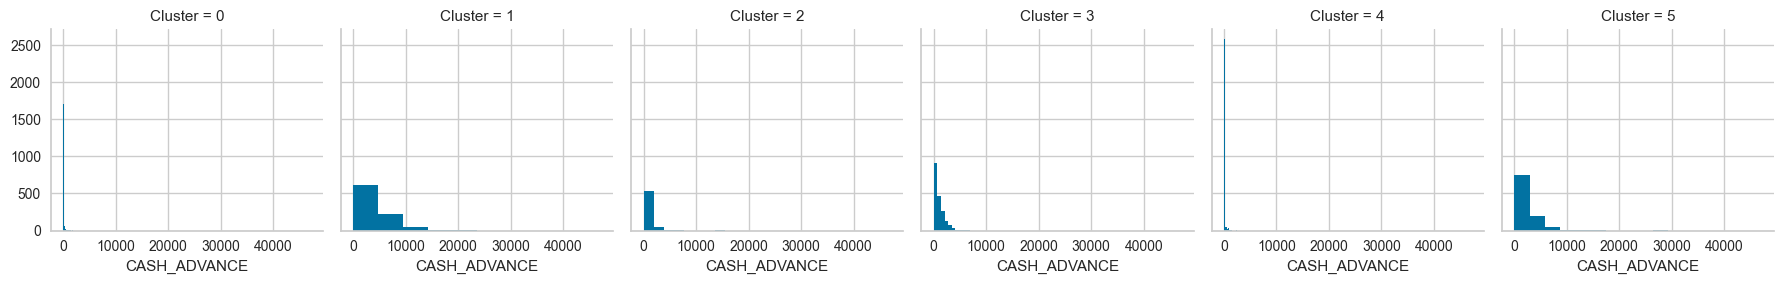

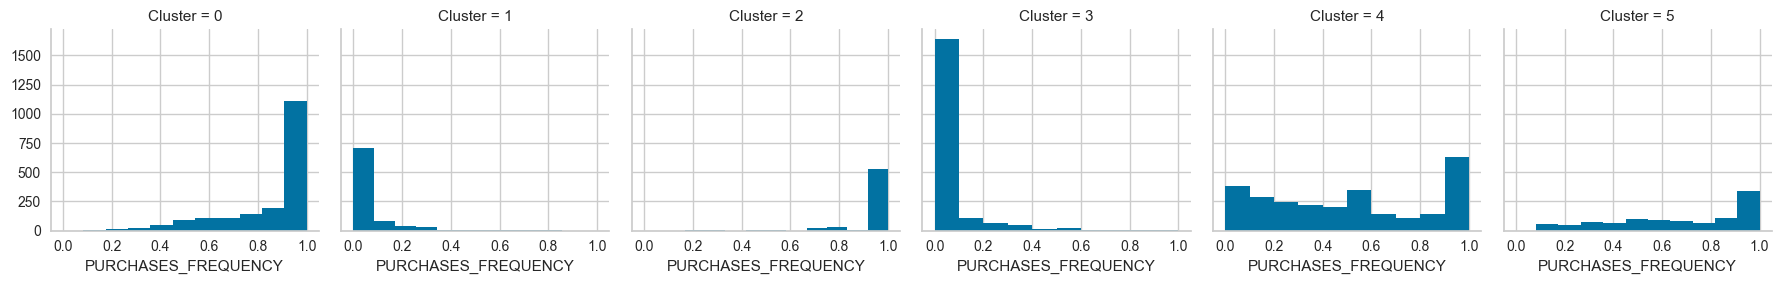

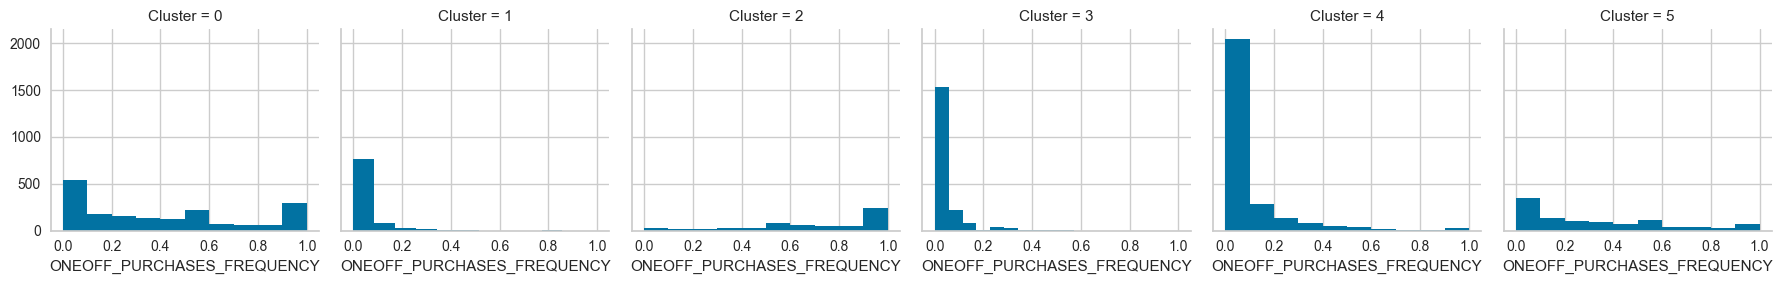

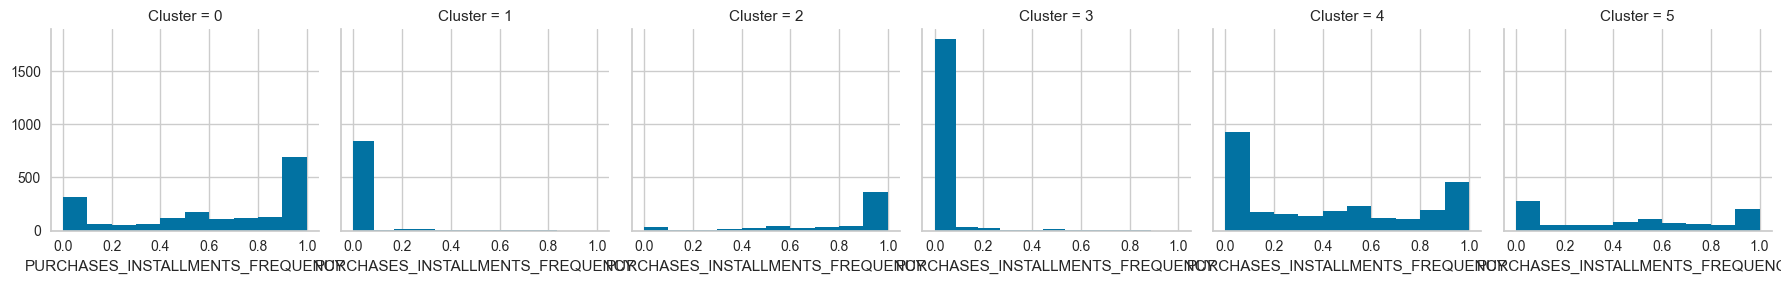

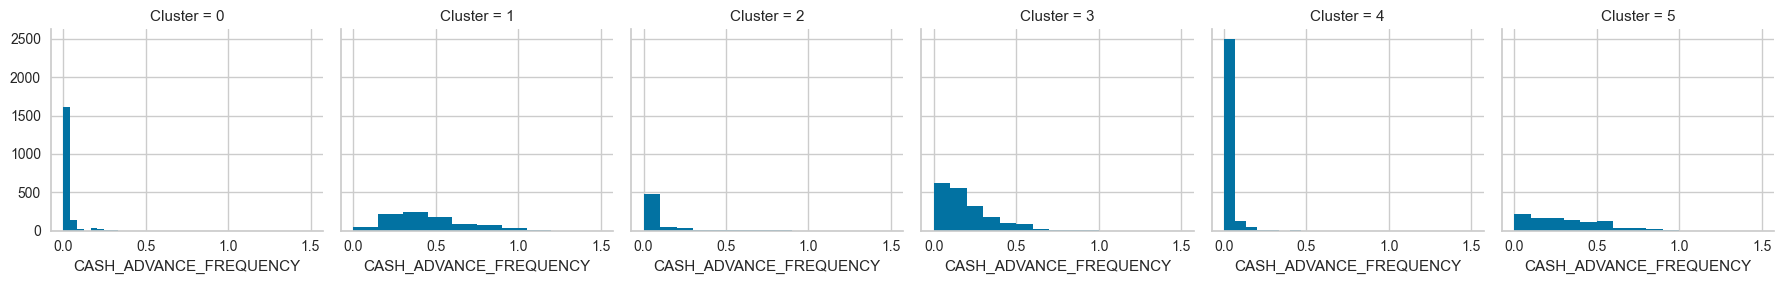

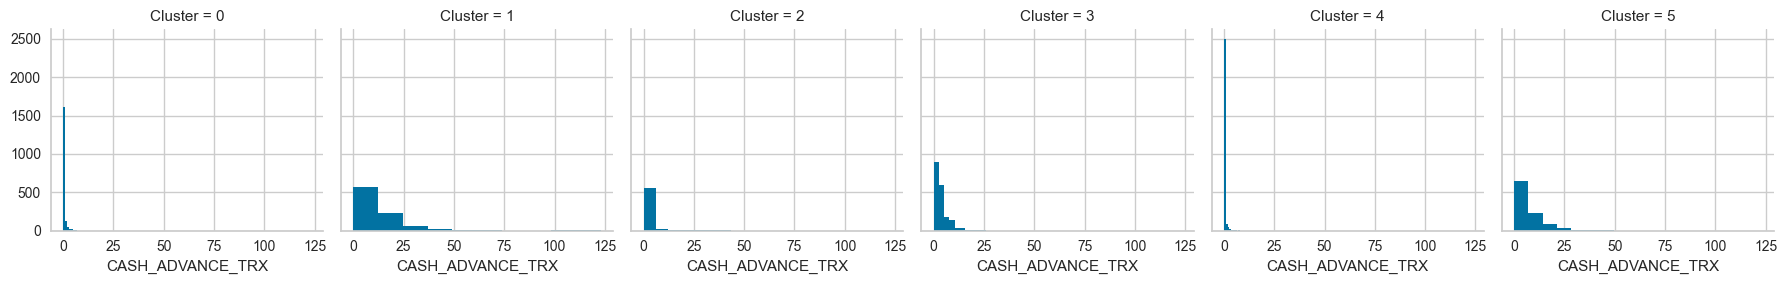

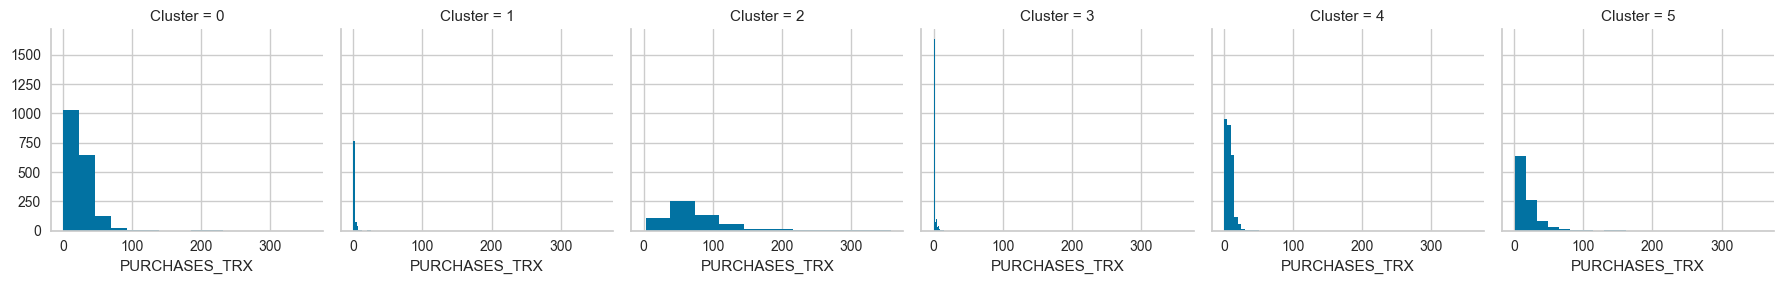

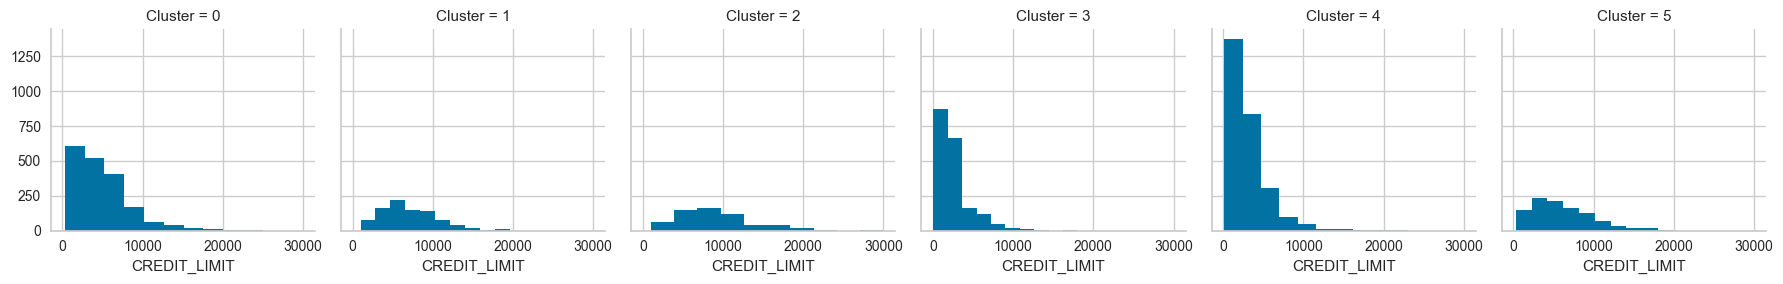

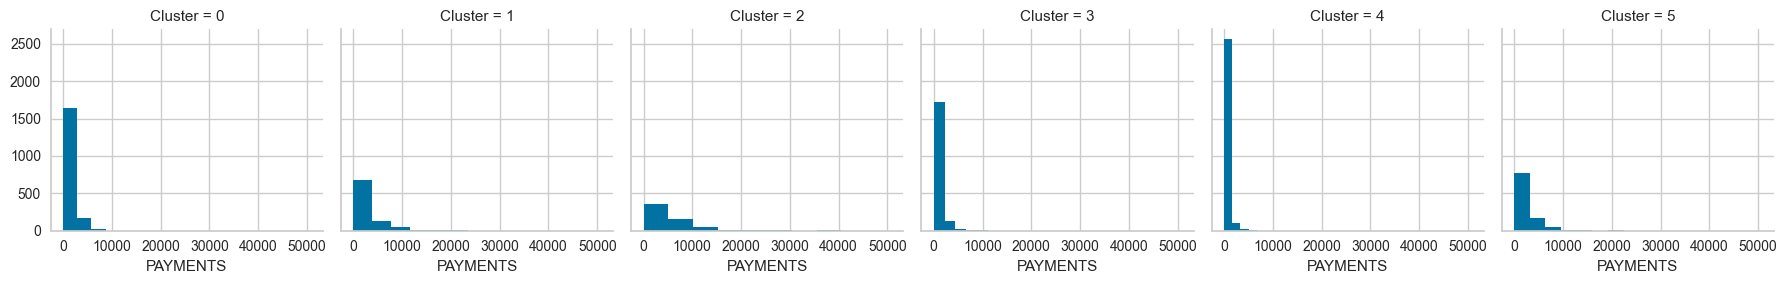

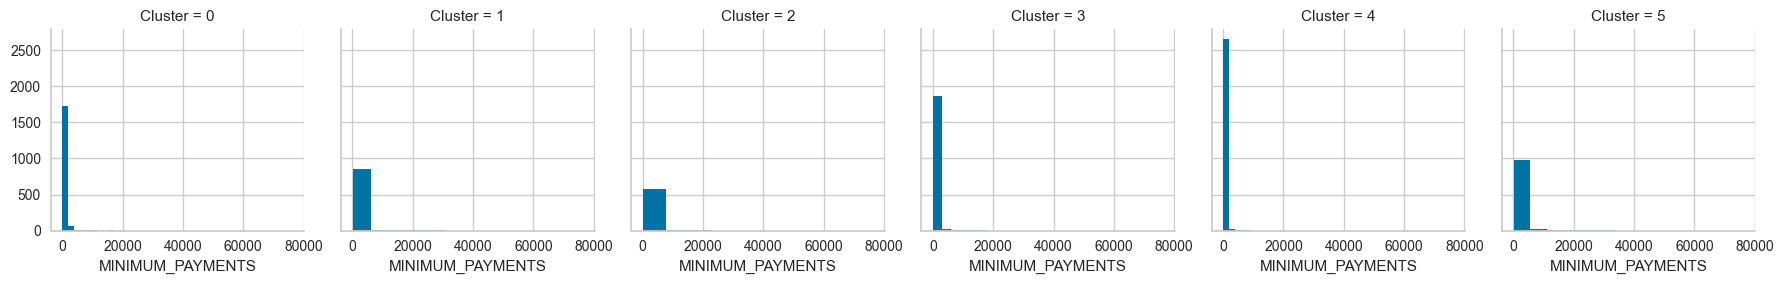

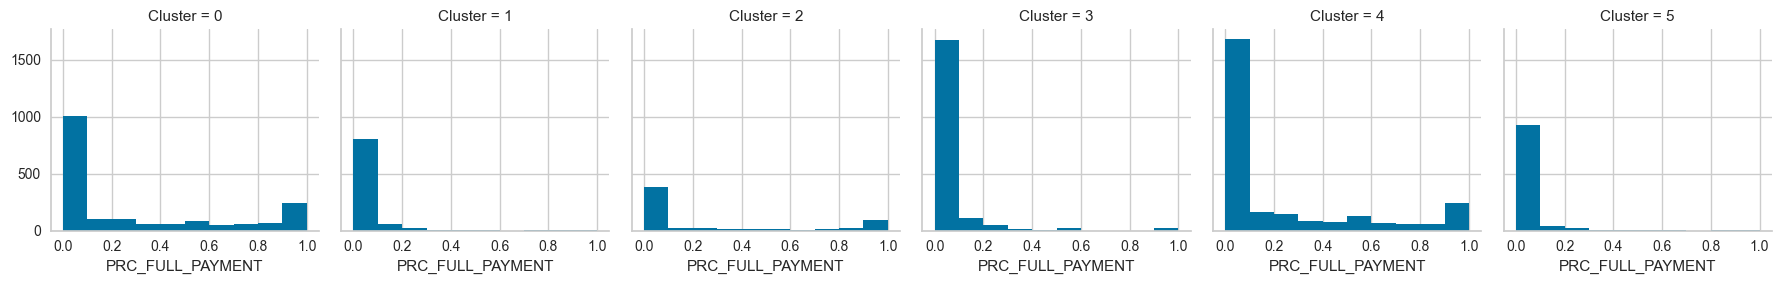

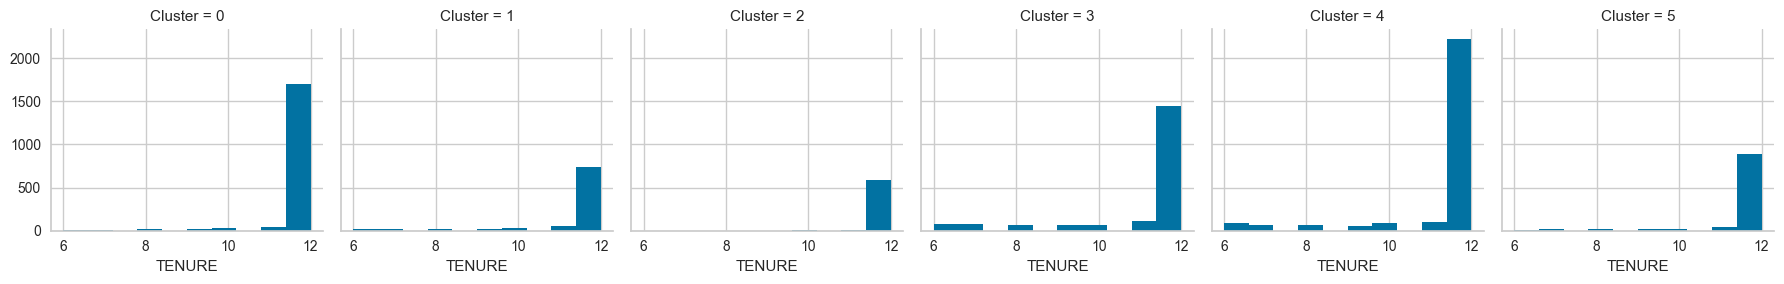

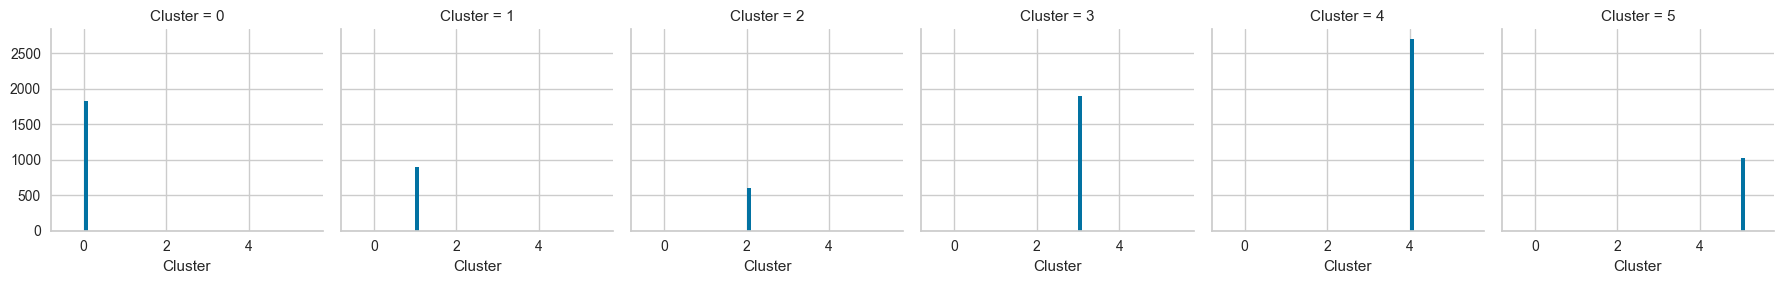

In [56]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='Cluster')
    grid.map(plt.hist, c)

In [57]:
clusters2= pd.concat([df2, pd.DataFrame({'Cluster':labels})], axis=1)

### Visualizing the clusters after KMeans Clustering

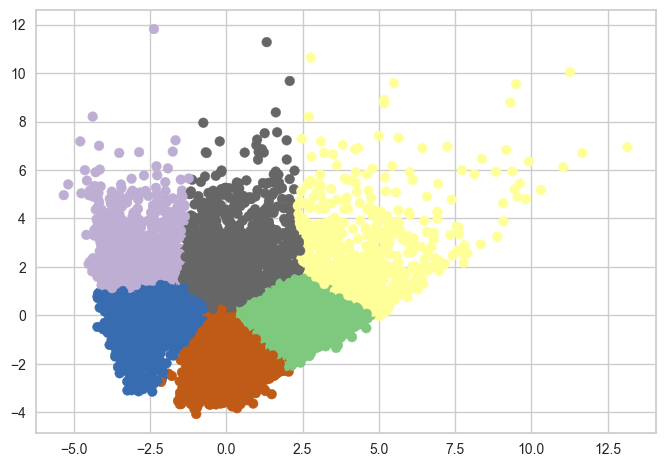

In [58]:
pca_clusters=pd.concat([pca_df, pd.DataFrame({'Cluster':labels})], axis=1)
plt.scatter(pca_clusters['pca1'], pca_clusters['pca2'], c = labels, cmap =plt.cm.Accent)
plt.show() 

### Evaluating our model

In [59]:
print(f'Davies-Bouldin index = {davies_bouldin_score(pca_df, labels)}')
print(f'Silhouette Score = {silhouette_score(pca_df, labels)}')

Davies-Bouldin index = 0.8334811672308157
Silhouette Score = 0.3800372570196679


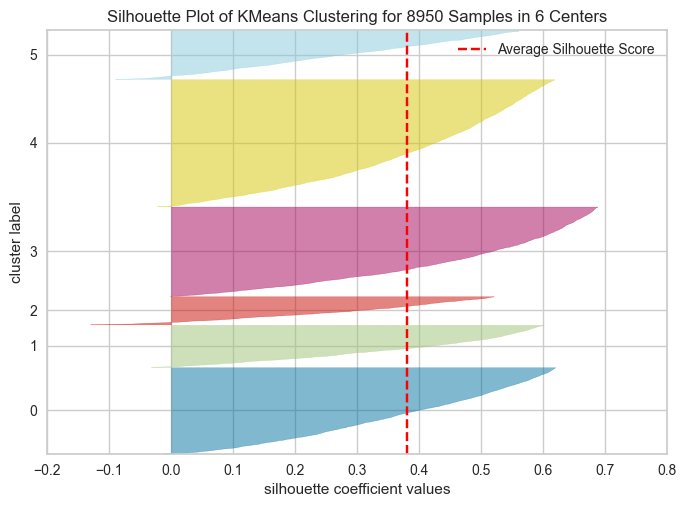

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8950 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [60]:
pca_df = pd.concat([pca_df, pd.DataFrame({'Cluster':labels})], axis=1)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(pca_df.drop(['Cluster'],axis=1))
visualizer.show()

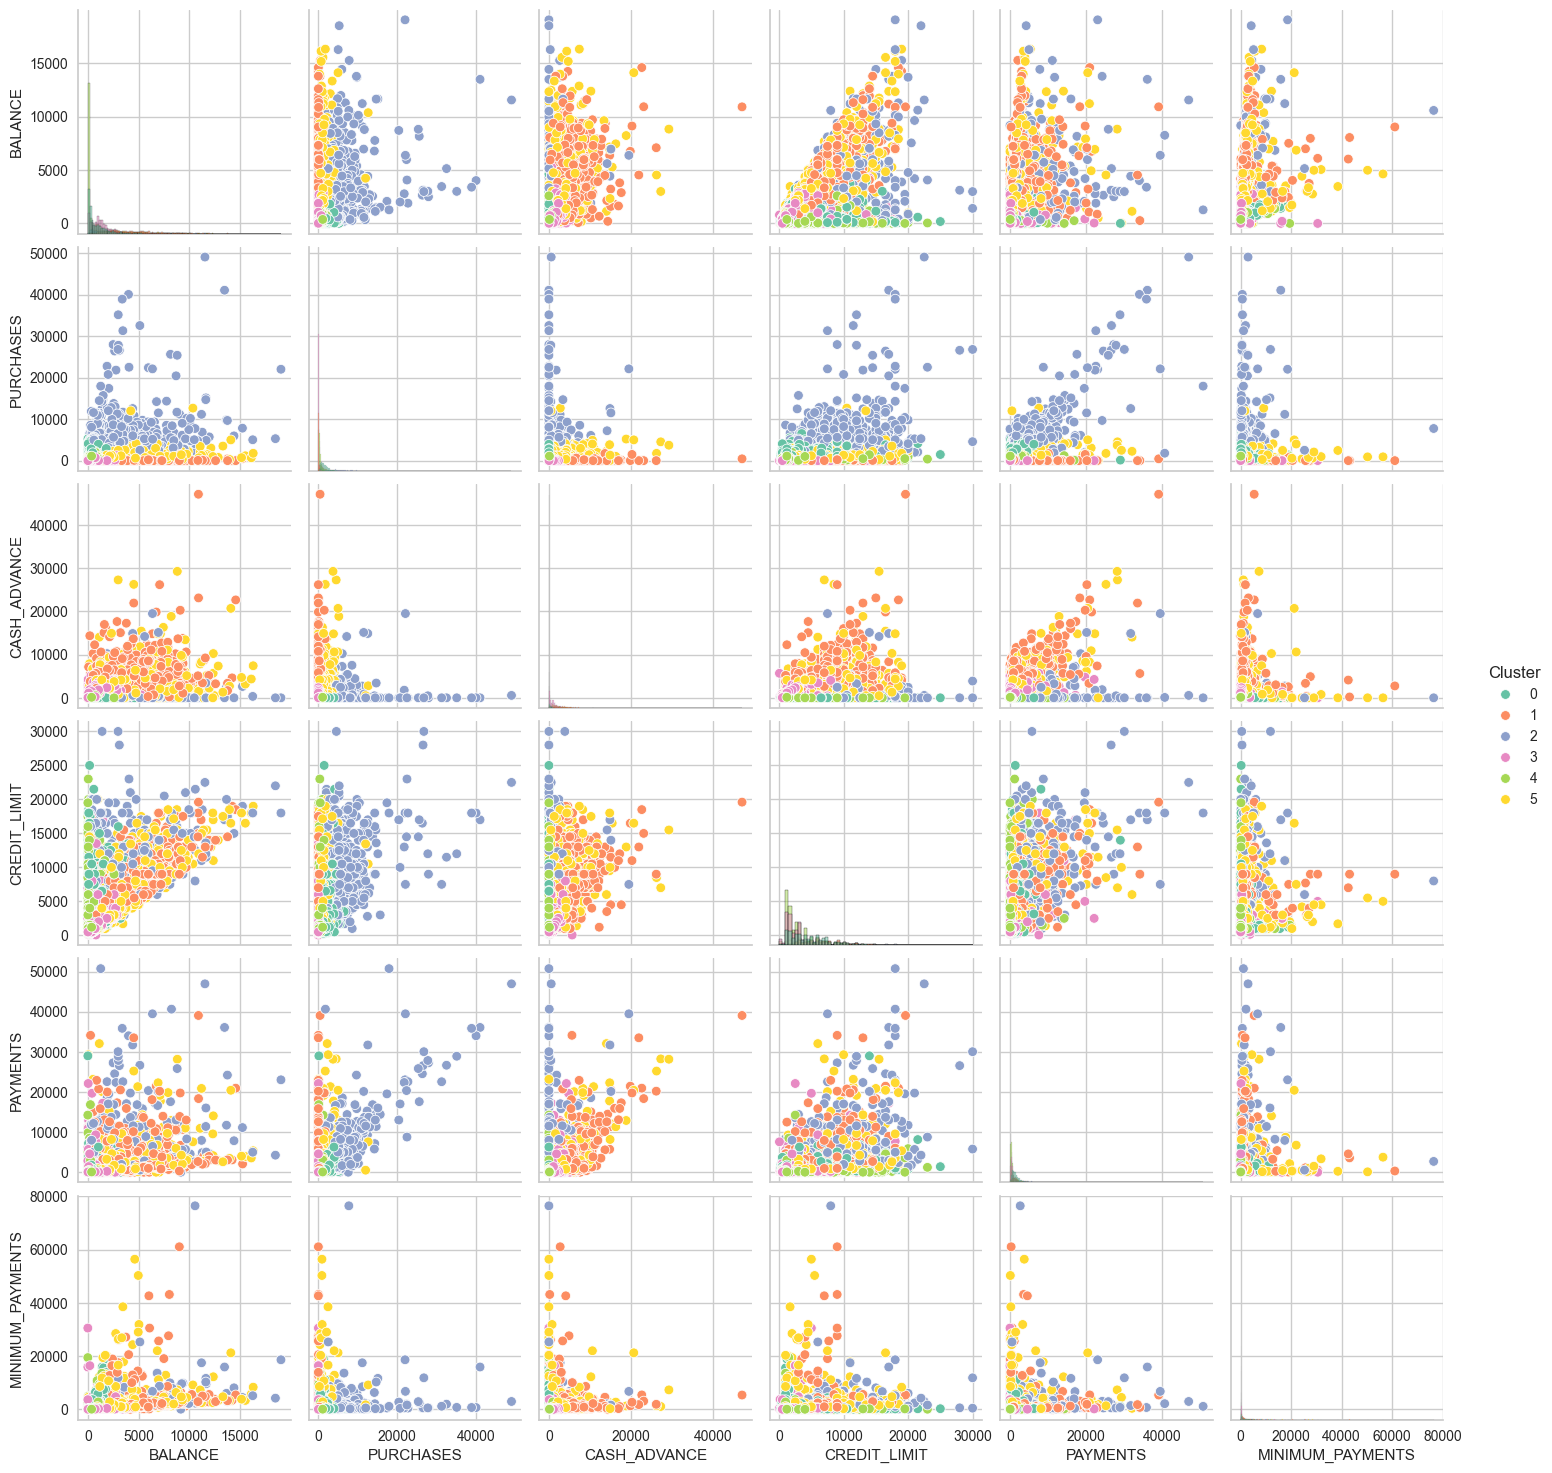

In [61]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", 'Cluster']
sns.pairplot( clusters[ best_cols ], hue="Cluster", palette='Set2', diag_kind="hist")

### Analysis of results and clusters using the mean values in the clusters

In [62]:
analysis_cluster = clusters.groupby('Cluster').apply(lambda x: x.mean()).T
analysis_cluster

Cluster,0,1,2,3,4,5
BALANCE,815.168931,4341.722168,3142.436422,1221.701576,336.483758,3434.263967
BALANCE_FREQUENCY,0.953821,0.967391,0.988864,0.862654,0.744195,0.974617
PURCHASES,1544.777604,91.441745,6292.428077,48.673461,368.480233,1187.730879
ONEOFF_PURCHASES,828.532877,79.305403,4114.739866,39.461910,158.466949,732.316846
INSTALLMENTS_PURCHASES,716.327473,12.250067,2178.691555,9.222073,210.565805,455.727520
CASH_ADVANCE,42.505358,4337.170122,620.344902,1010.546612,34.950832,2362.479486
PURCHASES_FREQUENCY,0.855521,0.066514,0.957818,0.047951,0.516516,0.686345
ONEOFF_PURCHASES_FREQUENCY,0.398344,0.042322,0.723655,0.027439,0.088799,0.312151
PURCHASES_INSTALLMENTS_FREQUENCY,0.624777,0.022012,0.810422,0.018603,0.407972,0.464369
CASH_ADVANCE_FREQUENCY,0.014966,0.452695,0.072991,0.206379,0.010403,0.305997


In [63]:
clusters['Cluster'].value_counts()

Cluster
4    2701
3    1901
0    1832
5    1024
1     894
2     598
Name: count, dtype: int64

### Inference from the clusters

- Cluster 0: Smallest Spenders and Lowest Credit Limit - this is the group with the lowest credit limit but they don't appear to buy much. Unfortunately this appears to be the largest group of customers.

- Cluster 1: Medium Spenders with third highest Payments - the second highest Purchases group (after the Big Spenders).

- Cluster 2: Big Spenders with large Payments - they make expensive purchases and have a credit limit that is between average and high. This is only a small group of customers.

- Cluster 3: Cash Advances with Small Payments - this group likes taking cash advances, but make only small payments.

- Cluster 4: Small Spenders and Low Credit Limit - they have the smallest Balances after the Smallest Spenders, their Credit Limit is in the bottom 3 groups

- Cluster 5: Cash Advances with large Payments but Highest Credit Limit and Frugal - this group takes the most cash advances. They make large payments, but this appears to be a small group of customers. this group doesn't make a lot of purchases. It looks like the 3rd largest group of customers.